# Winning Jeoopady

In this project, we want to win on Jeopady, a popular TV show in the U.S.

To study the historical questions on Jeopady, we will analyze a dataset from [reddit](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
%matplotlib inline

jeopady = pd.read_csv('JEOPARDY_CSV.csv')
print(jeopady.shape)
jeopady.head()

(216930, 7)


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [2]:
new_col = []
for col in jeopady.columns:
    col = col.replace(' ', '')
    new_col.append(col)
jeopady.columns = new_col
jeopady.columns

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [3]:
jeopady[jeopady['Answer'].isnull()]

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
94817,4346,2003-06-23,Jeopardy!,"GOING ""N""SANE",$200,"It often precedes ""and void""",NaN
143297,6177,2011-06-21,Double Jeopardy!,NOTHING,$400,"This word for ""nothing"" precedes ""and void"" to...",NaN


In [4]:
jeopady = jeopady[jeopady['Answer'].notnull()]

In [5]:
href = jeopady[jeopady['Question'].str.contains('http')].copy()

In [6]:
href['clean_question'] = href['Question'].str.replace(r'</a>', '').str.replace(r'<.*\">', '')
href[['Question', 'clean_question']]

,Question,clean_question
29,"<a href=""http://www.j-archive.com/media/2004-1...","Beyond ovoid abandonment, beyond ovoid betraya..."
39,"The shorter glass seen <a href=""http://www.j-a...","The shorter glass seen here, or a quaint cockt..."
40,"<a href=""http://www.j-archive.com/media/2004-1...","Ripped from today's headlines, he was a turtle..."
45,"<a href=""http://www.j-archive.com/media/2004-1...",Somewhere between truth & fiction lies Marco's...
50,"<a href=""http://www.j-archive.com/media/2004-1...","""500 Hats""... 500 ways to die. On July 4th, t..."
62,"(<a href=""http://www.j-archive.com/media/2010-...",(Tate: I'm Tate Shaffer aboard the <i>National...
89,"Say the name of <a href=""http://www.j-archive....",Say the name of this type of mollusk you see
95,"Say <a href=""http://www.j-archive.com/media/20...",Say this state that was admitted to the Union ...
100,"<a href=""http://www.j-archive.com/media/2010-0...",This dog breed seen here is a loyal and protec...
101,"Say the name of <a href=""http://www.j-archive....","Say the name of this bug; don't worry, it does..."


In [7]:
jeopady['clean_question'] = jeopady['Question'].str.replace(r'</a>', '').str.replace(r'<.*\">', '')

In [8]:
def normalize_string(string):
    try:
        string = string.lower().replace(',', '').replace(':', '').replace(';', '').replace('.', '').replace('\'', '').replace('\"','').replace('(', '').replace(')', '')
    except:
        print(string)
    return string
    
jeopady['clean_question'] = jeopady['clean_question'].apply(normalize_string)
jeopady['clean_answer'] = jeopady['Answer'].apply(normalize_string)
jeopady.head(20)

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant,in the title of an aesop fable this insect sha...,the ant
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,built in 312 bc to link rome & the south of it...,the appian way
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,no 8 30 steals for the birmingham barons 2306 ...,michael jordan
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington,in the winter of 1971-72 a record 1122 inches ...,washington
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel,this housewares store was named for the packag...,crate & barrel


In [9]:
print(jeopady.shape)
jeopady['Value'].value_counts().sort_index()

(216928, 9)


$1,000      2101
$1,020         1
$1,100        63
$1,111         2
$1,183         1
$1,200       441
$1,203         1
$1,246         1
$1,263         2
$1,300        75
$1,347         1
$1,400       228
$1,407         1
$1,492         1
$1,500       546
$1,512         1
$1,534         1
$1,600       239
$1,700        44
$1,777         1
$1,800       182
$1,801         1
$1,809         1
$1,810         1
$1,900        28
$10,000       22
$10,400        1
$10,800        6
$100        9029
$1000      19539
           ...  
$6,435         1
$6,600         8
$6,700         1
$6,800         3
$600       20377
$601           1
$7,000        39
$7,200         5
$7,400         4
$7,500         4
$7,600         3
$7,800         8
$700         203
$750           4
$796           1
$8,000        20
$8,200         4
$8,400         3
$8,500         1
$8,600         3
$8,700         1
$8,800         1
$8,917         1
$800       31860
$9,000         8
$9,200         1
$9,500         1
$9,800        

In [10]:
def normalize_value(value):
    try:
        value = int(value[1:].replace(',', ''))
    except:
        value = 0
    return value

jeopady['clean_value'] = jeopady['Value'].apply(normalize_value)
jeopady['clean_value'].value_counts().sort_index()

0         3634
5            9
20           1
22           1
50           1
100       9029
200      30454
250          5
300       8663
350          2
367          1
400      42243
500       9016
585          1
600      20377
601          1
700        203
750          4
796          1
800      31860
900        114
1000     21640
1020         1
1100        63
1111         2
1183         1
1200     11772
1203         1
1246         1
1263         2
         ...  
7500         4
7600         3
7800         8
8000        20
8200         4
8400         3
8500         1
8600         3
8700         1
8800         1
8917         1
9000         8
9200         1
9500         1
9800         1
10000       22
10400        1
10800        6
11000        1
11200        1
11600        1
12000        3
12400        1
13000        3
13200        1
13800        1
14000        1
14200        1
16400        1
18000        1
Name: clean_value, Length: 146, dtype: int64

In [11]:
jeopady['AirDate'] = pd.to_datetime(jeopady['AirDate'])
jeopady.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216928 entries, 0 to 216929
Data columns (total 10 columns):
ShowNumber        216928 non-null int64
AirDate           216928 non-null datetime64[ns]
Round             216928 non-null object
Category          216928 non-null object
Value             216928 non-null object
Question          216928 non-null object
Answer            216928 non-null object
clean_question    216928 non-null object
clean_answer      216928 non-null object
clean_value       216928 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 18.2+ MB


## Analyzing Questions and Answers
### Deducible answers

In [12]:
def count_q_in_a(row):
    split_answer = row['clean_answer'].split()
    split_question = row['clean_question'].split()
    if 'the' in split_answer:
        split_answer.remove('the')
    if len(split_answer)==0:
        return 0    
    
    match_count = 0
    for a in split_answer:
        if a in split_question:
            match_count += 1
    return match_count/len(split_answer)

jeopady['answer_in_question'] = jeopady.apply(count_q_in_a, axis=1)
jeopady['answer_in_question'].mean()

0.05732102086515145

In [13]:
jeopady['answer_in_question'].value_counts().sort_index()

0.000000    190031
0.058824         1
0.066667         1
0.071429         1
0.076923         1
0.083333         3
0.090909         5
0.100000        12
0.105263         1
0.111111        34
0.125000        72
0.133333         2
0.142857       147
0.153846         6
0.166667       309
0.181818         7
0.200000       824
0.214286         4
0.222222        29
0.230769         4
0.250000      1824
0.266667         1
0.272727        10
0.285714       100
0.294118         1
0.300000        14
0.307692         1
0.333333      5655
0.350000         1
0.357143         1
0.363636         1
0.375000        29
0.400000       336
0.416667         1
0.428571        40
0.444444         5
0.454545         1
0.466667         1
0.500000     14686
0.538462         1
0.545455         2
0.555556         3
0.571429        18
0.600000        93
0.615385         1
0.625000         4
0.636364         1
0.666667      1057
0.700000         2
0.714286         5
0.750000       118
0.777778         1
0.800000    

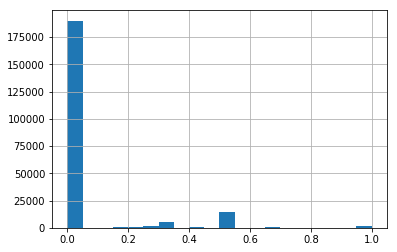

In [14]:
jeopady['answer_in_question'].hist(bins=20)

In [15]:
deducible_questions_rate = len(jeopady[jeopady['answer_in_question']>0.5])/len(jeopady)
deducible_questions_rate

0.01256638147219354

In [16]:
questions_per_day = jeopady.groupby('AirDate').agg({'clean_question': len}).mean()
questions_per_day[0]

59.5956043956044

In [17]:
deducible_questions_day = questions_per_day[0] * deducible_questions_rate
deducible_questions_day
print('{:.2} answers could be deducible from questions (technically questions with more than half of words in answer are told in questions)'.format(deducible_questions_day))

0.75 answers could be deducible from questions (technically questions with more than half of words in answer are told in questions)


### Same Questions as Before

In [18]:
question_overlap = []
terms_used = set([])

for index, row in jeopady.sort_values('AirDate').iterrows():
    split_question = row['clean_question'].split()
    for q in split_question:
        if len(q)<6:
            split_question.remove(q)
            
    match_count = 0
    for q in split_question:
        if q in terms_used:
            match_count += 1
        terms_used.add(q)
    if len(split_question)>0:
        match_count /= len(split_question)
    question_overlap.append(match_count)
    
np.mean(question_overlap)

0.9305202579836598

(array([1.5810e+03, 7.2000e+01, 2.7100e+02, 4.9000e+02, 4.1500e+02,
        3.6050e+03, 4.8740e+03, 9.6500e+03, 3.5490e+04, 1.6048e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

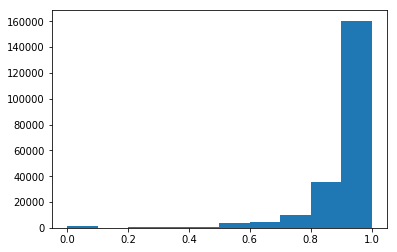

In [19]:
plt.hist(question_overlap)

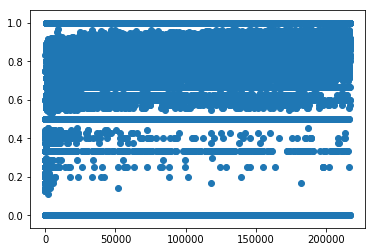

In [20]:
q_num = []
for i in range(len(question_overlap)):
    q_num.append(i)

plt.scatter(q_num, question_overlap)

In [21]:
qo_df = pd.Series(question_overlap)
overlaped_q_rate = qo_df[qo_df>qo_df.mean()].count()/qo_df.count()
print('{:.3%} questions contained more than 90% words previous questions contained.'.format(overlaped_q_rate))

65.091% questions contained more than 90% words previous questions contained.


## More Money on Jeopady

739.9925320843782


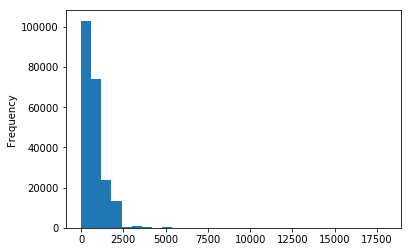

In [22]:
print(jeopady['clean_value'].mean())
jeopady['clean_value'].plot.hist(bins=30)

In [23]:
jeopady[jeopady['clean_value']>2500]['clean_value'].count()/jeopady['clean_value'].count()

0.01054266853518218

According to the mean and histogram of values, we will narrow down the questions into three categories:
- Low value -- Any row where `clean_value` is less than 800.
- High value -- Any row where `clean_value` is greater than 800 and less than 2500.
- Very high value -- Any row where `clean_value` is greater than 2500.

In [24]:
def categorize(row):
    if row['clean_value']>2500:
        value = 2
    elif row['clean_value']>800:
        value = 1
    else:
        value = 0
    return value

jeopady['high_value'] = jeopady.apply(categorize, axis=1)

In [25]:
jeopady['high_value'].value_counts(normalize=True)

0    0.716855
1    0.272602
2    0.010543
Name: high_value, dtype: float64

In [26]:
list(terms_used)[:30]

['bueno',
 'identification',
 'pectin-rich',
 'merida',
 'bookseller',
 'rothesay',
 'cunegonde',
 'luxembourg--sorry',
 'dishabille',
 'rugs',
 'accompaniment',
 'predominately',
 'phoebes',
 'chunnel',
 'quezon',
 'anagrammed',
 'wingfield',
 'out-of-the-way',
 'hurricane-driven',
 'hellbound',
 'kstan',
 'trampolines',
 'baryshnikov',
 'nyssa',
 'toscanelli',
 'gibsons',
 'duckling”',
 'influenza',
 'plaque',
 'chibcha']

In [44]:
def value_count(word):
    low_count = 0
    high_count = 0
    very_high_count = 0
    
    for index, row in jeopady.iterrows():
        split_question = row['clean_question'].split()
        if word in split_question:
            if row['high_value']==2:
                very_high_count += 1
            elif row['high_value']==1:
                high_count +=1
            else:
                low_count +=1
    return low_count, high_count, very_high_count

In [45]:
check_terms = []
observed_expected = []
comparison_terms = list(terms_used)[:20]

for term in comparison_terms:
    check_terms.append(term)
    observed_expected.append(value_count(term))

print(check_terms)
print(observed_expected)

['bueno', 'identification', 'pectin-rich', 'merida', 'bookseller', 'rothesay', 'cunegonde', 'luxembourg--sorry', 'dishabille', 'rugs', 'accompaniment', 'predominately', 'phoebes', 'chunnel', 'quezon', 'anagrammed', 'wingfield', 'out-of-the-way', 'hurricane-driven', 'hellbound']
[(1, 2, 0), (11, 0, 0), (0, 1, 0), (0, 1, 0), (4, 2, 0), (1, 0, 0), (2, 0, 0), (0, 0, 1), (0, 1, 0), (4, 1, 0), (20, 4, 0), (1, 0, 0), (2, 0, 0), (2, 1, 0), (5, 5, 0), (2, 0, 0), (5, 5, 0), (1, 2, 1), (1, 0, 0), (1, 0, 0)]


In [46]:
very_high_value_count = jeopady[jeopady['high_value']==2]['high_value'].count()
high_value_count = jeopady[jeopady['high_value']==1]['high_value'].count()
low_value_count = jeopady[jeopady['high_value']==0]['high_value'].count()

print(very_high_value_count, high_value_count, low)
chi_squared = []
for o_e in observed_expected:
    total = sum(o_e)
    total_prop = total/jeopady['high_value'].count()
    
    expected = [total_prop*very_high_value_count, total_prop*high_value_count, total_prop*low_value_count]
    chi_value, pvalue = chisquare(list(o_e), expected)
    chi_squared.append([chi_value, pvalue])

[[33.50868456333509, 5.2927526607608785e-08],
 [1032.3790992566678, 6.633259387096771e-225],
 [2.6683520757588566, 0.2633750971796924],
 [2.6683520757588566, 0.2633750971796924],
 [249.38595574909218, 7.023082611680547e-55],
 [93.85264538696983, 4.170201097174615e-21],
 [187.70529077393965, 1.7390577190876233e-41],
 [0.3949815441204841, 0.8207877147723639],
 [2.6683520757588566, 0.2633750971796924],
 [299.2621356534552, 1.0376548529964883e-65],
 [1559.3229911666697, 0.0],
 [93.85264538696983, 4.170201097174615e-21],
 [187.70529077393965, 1.7390577190876233e-41],
 [124.69297787454609, 8.38038341108595e-28],
 [236.30249365682167, 4.8704094390117535e-52],
 [187.70529077393965, 1.7390577190876233e-41],
 [236.30249365682167, 4.8704094390117535e-52],
 [23.73025880853143, 7.031367101478856e-06],
 [93.85264538696983, 4.170201097174615e-21],
 [93.85264538696983, 4.170201097174615e-21]]

<BarContainer object of 20 artists>

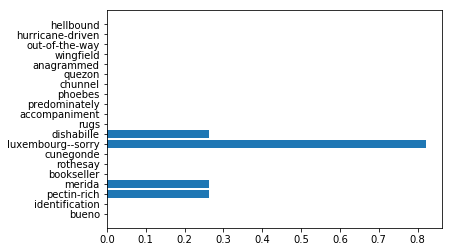

In [57]:
p_value = [p for chi, p in chi_squared]
plt.barh(check_terms, p_value)